### Obtaining a data set

I've put a zipped csv file from Lending Tree containing mortage data on One Drive. You should all have access. You can find it here: https://glgit-my.sharepoint.com/:u:/g/personal/jobelenus_glgroup_com/EUoBwtK-k89KopT44j4DjqsB_N2IPj36kuZUmY7SpDgTwg?e=fgEzC0

I've added a column reference here: https://github.com/jobelenus/python-data-analysis-crash-course/blob/master/01-Pandas/reference.md.



### Analyzing the data

*Note: Skip Line 1! Line 2 is the header, so skip that too!*

1. Try and group the dataset by "grade" (A,B,C,D,F).
2. Then see if the highest interest rate in B is greater than the lowest in A, for each grade (e.g. compare a grade with the one above it)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

In [6]:
df = pd.read_csv("LoanStats3d.csv.zip", compression="zip", header=1, sep=',')
# transform some columns
df["int_rate"] = df["int_rate"].str.rstrip("%").astype(float) / 100.0
df["term"] = df["term"].str[:3].astype(float)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data = df.groupby("grade", as_index=False).agg({
        "int_rate": ["count", "min", "median", "mean", "max"]
    })
print(data)




  grade int_rate                                  
           count     min  median      mean     max
0     A    73336  0.0532  0.0692  0.069416  0.0819
1     B   117606  0.0600  0.0999  0.100443  0.1199
2     C   120567  0.0600  0.1333  0.132980  0.1499
3     D    62654  0.0600  0.1699  0.167235  0.1849
4     E    34948  0.0600  0.1899  0.192900  0.2199
5     F     9817  0.0600  0.2399  0.236129  0.2606
6     G     2167  0.2580  0.2677  0.268352  0.2899


In [9]:
data = df.groupby("sub_grade", as_index=False).agg({
        "int_rate": ["count", "min", "median", "mean", "max"]
    })
print(data)


   sub_grade int_rate                                  
                count     min  median      mean     max
0         A1    12373  0.0532  0.0532  0.054615  0.0603
1         A2    11529  0.0600  0.0624  0.063053  0.0649
2         A3    10889  0.0668  0.0689  0.068553  0.0699
3         A4    15486  0.0600  0.0726  0.071999  0.0749
4         A5    23059  0.0600  0.0789  0.079212  0.0819
5         B1    22096  0.0600  0.0818  0.082467  0.0867
6         B2    22171  0.0600  0.0917  0.091996  0.0949
7         B3    24637  0.0600  0.0999  0.100096  0.1049
8         B4    25121  0.0600  0.1099  0.109977  0.1144
9         B5    23581  0.0600  0.1153  0.115434  0.1199
10        C1    26434  0.0600  0.1229  0.122446  0.1239
11        C2    25496  0.0600  0.1269  0.127039  0.1299
12        C3    24844  0.0600  0.1333  0.133371  0.1366
13        C4    24752  0.0600  0.1399  0.139603  0.1431
14        C5    19041  0.0600  0.1465  0.146438  0.1499
15        D1    16977  0.0600  0.1561  0.155768 

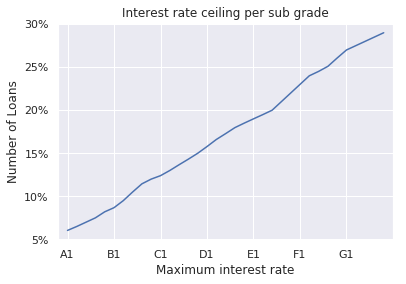

In [26]:
g = sns.lineplot(data=data[("int_rate","max")])
g.set_xlim(-1,35)
g.set(xticks=[0,5,10,15,20,25,30,35])
g.set(xticklabels=data[("sub_grade","")][0::5])
g.set(title="Interest rate ceiling per sub grade")
g.set(xlabel="Maximum interest rate", ylabel="Number of Loans")
g.set(yticklabels=["{0:.0%}".format(f) for f in g.get_yticks()])
plt.show()

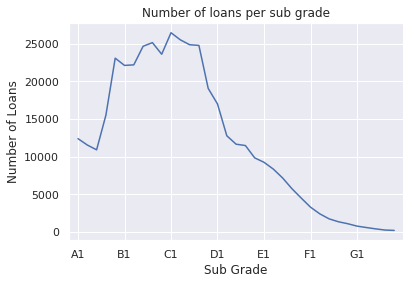

In [16]:
g = sns.lineplot(data=data[("int_rate","count")])
g.set_xlim(-1,35)
g.set(xticks=[0,5,10,15,20,25,30,35])
g.set(xticklabels=data[("sub_grade","")][0::5])
g.set(title="Number of loans per sub grade")
g.set(xlabel="Sub Grade", ylabel="Number of Loans")
plt.show()

1. Try and group the data by loan status and term, to determine whether more shorter mortgages are fully paid off than longer ones

   loan_status  term loan_amnt
                         count
0  Charged Off  36.0     41939
1  Charged Off  60.0     32823
6   Fully Paid  36.0    240752
7   Fully Paid  60.0     56820


/home/casey/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


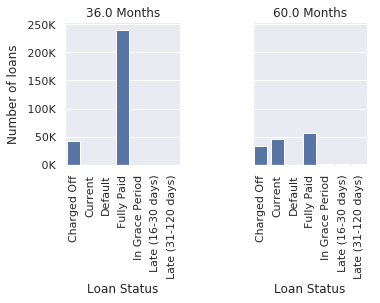

In [51]:
data = df.groupby(["loan_status", "term"]).agg({
    "loan_amnt": ["count"]
}).reset_index()

print(data.loc[
    (data[("loan_status","")] == "Charged Off") | (data[("loan_status","")] == "Fully Paid")
])

g = sns.FacetGrid(data, col=("term",""))
g.map(sns.barplot, ("loan_status",""), ("loan_amnt","count"))
g.set_xticklabels(rotation=90)
g.set_axis_labels("Loan Status", "Number of loans")
g.set_titles("{col_name} Months")

for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, p: "{0:4}K".format(int(x/1000))))

1. Try and select all the A grade mortgages, and add a new column that calculates the total amount of dollars the buyer will owe (loan_amt * int_rate).
2. Then add another column that tells you how many years it would take to pay it off if they paid with their entire annual income each year.

In [51]:
data = df.loc[df["grade"] == "A"][["loan_amnt", "term", "installment", "int_rate", "annual_inc"]]

data["repayment"] = data["installment"] * data["term"]
data["yearsToRepay"] = data["annual_inc"]
print(data)


        loan_amnt  term  installment int_rate  annual_inc  repayment
11        10000.0    36       306.45    6.49%     85000.0   11032.20
14        28000.0    36       858.05    6.49%     92000.0   30889.80
18         9600.0    36       298.58    7.49%     60000.0   10748.88
21        25000.0    36       777.55    7.49%    109000.0   27991.80
30         6000.0    36       187.77    7.91%    105000.0    6759.72
31        15000.0    36       451.73    5.32%     80000.0   16262.28
35        11000.0    36       337.09    6.49%     85000.0   12135.24
39        12000.0    36       361.38    5.32%     53750.0   13009.68
42        18000.0    36       559.83    7.49%     75000.0   20153.88
61        25000.0    36       752.87    5.32%    150000.0   27103.32
63         1500.0    36        45.97    6.49%     45000.0    1654.92
65        20000.0    36       612.89    6.49%     55000.0   22064.04
69         5000.0    36       156.48    7.91%     32000.0    5633.28
75        10000.0    36       312.

/home/casey/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


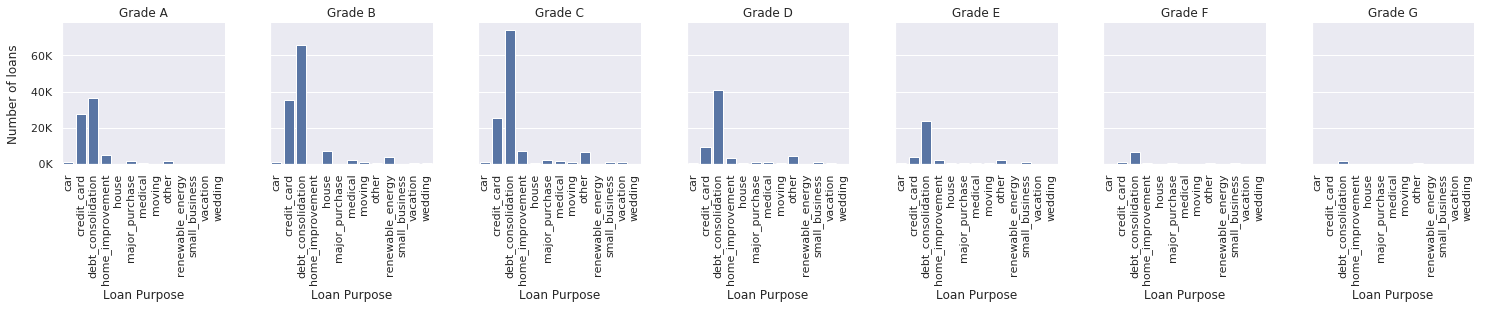

In [72]:
data = df.groupby(["grade","purpose"], as_index=False).agg("count")[["grade","purpose","loan_amnt"]]

g = sns.FacetGrid(data, col="grade")
g.map(sns.barplot, "purpose", "loan_amnt")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Loan Purpose", "Number of loans")
g.set_titles("Grade {col_name}")

for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, p: "{0:4}K".format(int(x/1000))))

/home/casey/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


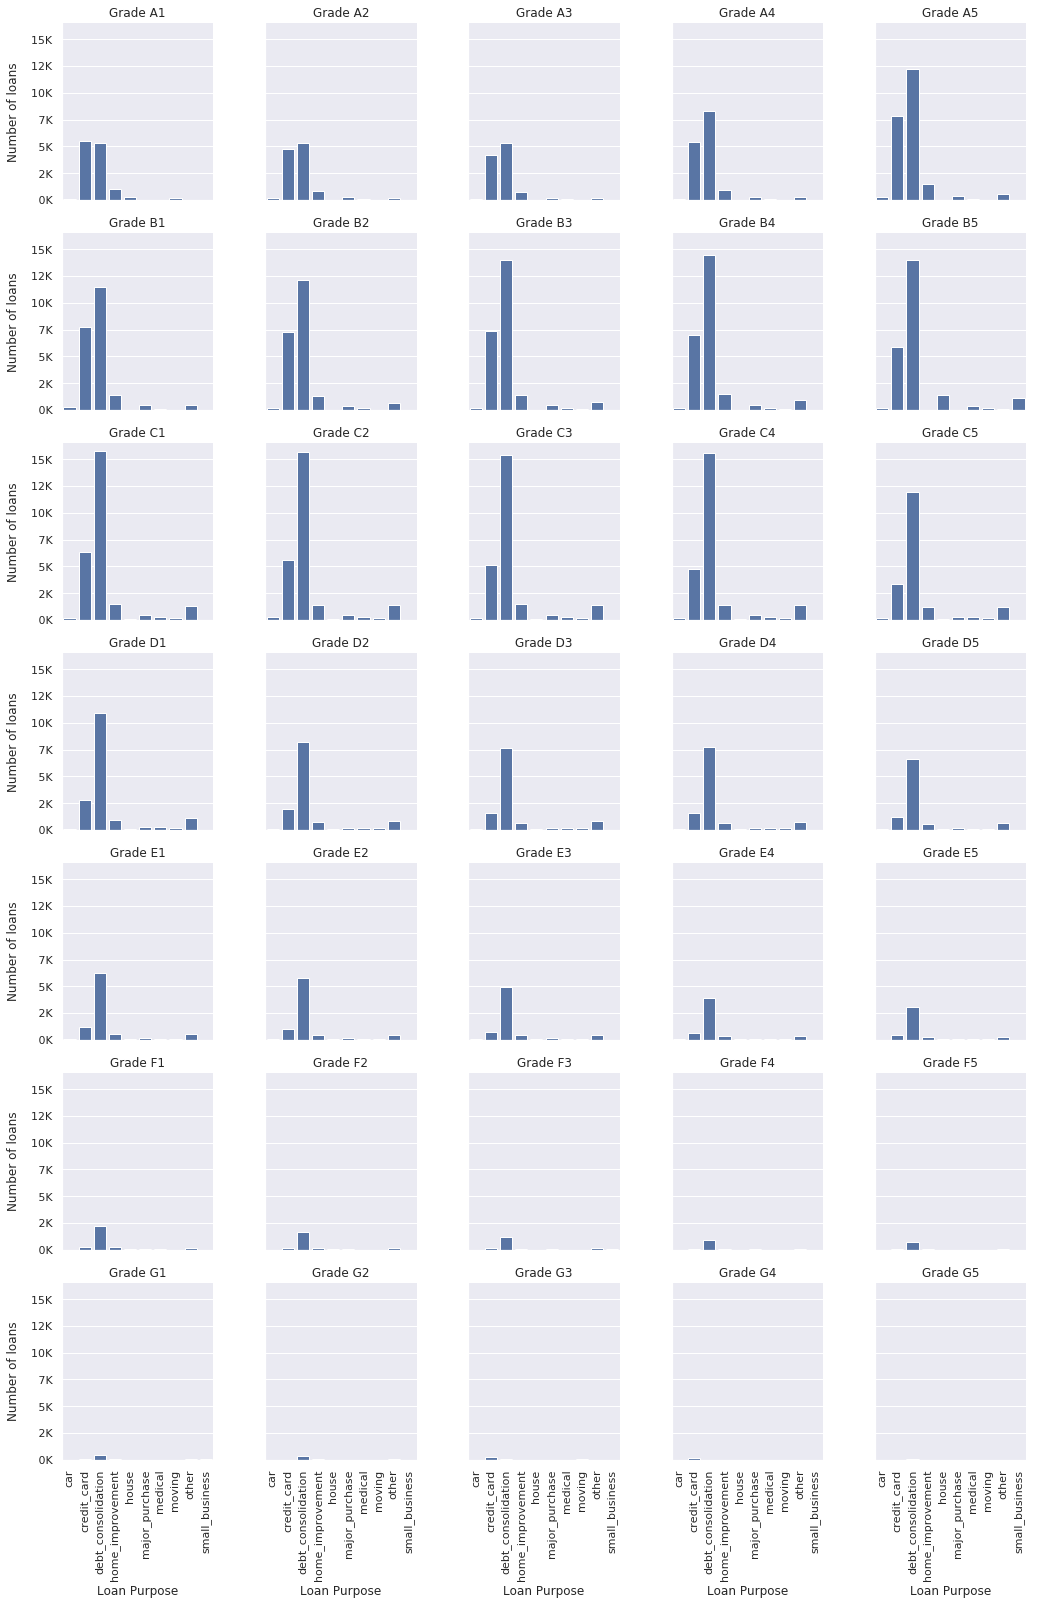

In [70]:
data = df.groupby(["sub_grade","purpose"], as_index=False).agg("count")[["sub_grade","purpose","loan_amnt"]]

g = sns.FacetGrid(data, col="sub_grade", col_wrap=5)
g.map(sns.barplot, "purpose", "loan_amnt")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Loan Purpose", "Number of loans")
g.set_titles("Grade {col_name}")

for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, p: "{0:4}K".format(int(x/1000))))

/home/casey/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


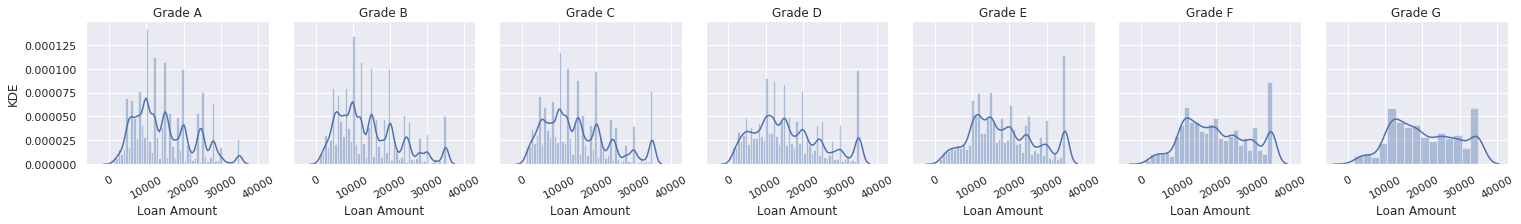

In [87]:
data = df[["grade","loan_amnt"]]
#print(data)

#histograms of loan amt

g = sns.FacetGrid(data, col="grade", col_order=["A","B","C","D","E","F","G"])
g.map(sns.distplot, "loan_amnt")
g.set_xticklabels(rotation=30)
g.set_axis_labels("Loan Amount", "KDE")
g.set_titles("Grade {col_name}")
